In [41]:
import sklearn
from sklearn import svm
import numpy as np
from numpy import ma
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
names =['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df = pd.read_csv('train.csv',header=None,sep=",",names=names, encoding = "ISO-8859-1")

df['toxic_score'] = df[['toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)
#drop unnecessary columns
df = df.drop(['id', 'toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate'], axis=1)
#drop first row
df.drop(df.index[:1], inplace=True)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
bad_words = []
negative_file = open("negative-words.txt", "r")
for line in negative_file:
    bad_words.append(line.strip("\n"))
negative_file.close()
profanity_file = open("profanity-words.txt", "r")
for line in profanity_file:
    if (line.strip("\n") not in bad_words):
        bad_words.append(line.strip("\n"))
profanity_file.close()

In [44]:
data = df.values

X = data[:,0].reshape((159571,1))
Y = data[:,1].reshape((159571,1))

toxic_count = 0
not_toxic_count = 0
val_toxic = 0
val_not_toxic = 0

X_tr = []
Y_tr = []
X_val = []
Y_val = []

data_size = 3000

for index in range(0,159571):
    if ((int(Y[index][0]) == 1 and toxic_count < 0.5 * data_size) or 
        (int(Y[index][0]) == 0 and not_toxic_count < 0.5 * data_size)):
        Y_tr.append(int(Y[index][0]))
        X_tr.append(X[index][0])
        if (int(Y[index][0]) == 1):
            toxic_count += 1
        else:
            not_toxic_count += 1
    if toxic_count == 0.5 * data_size and not_toxic_count == 0.5 * data_size:
        if ((int(Y[index][0]) == 1 and val_toxic < 0.5 * data_size) or 
            (int(Y[index][0]) == 0 and val_not_toxic < 0.5 * data_size)):
            Y_val.append(int(Y[index][0]))
            X_val.append(X[index][0])
            if (int(Y[index][0]) == 1):
                val_toxic += 1
            else:
                val_not_toxic += 1
        if val_toxic + val_not_toxic == data_size:
            break

# X_tr = np.array(X_tr).reshape((15000, 1))
Y_train = np.array(Y_tr).reshape((data_size, 1))
Y_test = np.array(Y_val).reshape((data_size, 1))


cv = sklearn.feature_extraction.text.CountVectorizer(vocabulary=bad_words)
X_train = cv.fit_transform(X_tr).toarray()
X_test = cv.fit_transform(X_val).toarray()

print(X_train, X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Linear SVM

In [45]:
acc_train_svm_linear = []

In [46]:
acc_test_svm_linear = []

In [47]:
c_svm_linear = []

In [48]:
def svm_linear(c):
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    svc_linear.fit(X_train, Y_train.ravel())
    
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train.ravel())
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test.ravel())
    
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)

In [49]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.506333
Test Accuracy = 0.504000
Train Accuracy = 0.521000
Test Accuracy = 0.519000
Train Accuracy = 0.654333
Test Accuracy = 0.642000
Train Accuracy = 0.814000
Test Accuracy = 0.777333
Train Accuracy = 0.915333
Test Accuracy = 0.829000
Train Accuracy = 0.933000
Test Accuracy = 0.822667
Train Accuracy = 0.933333
Test Accuracy = 0.819333


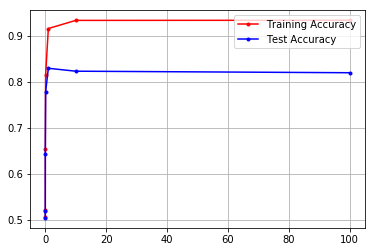

In [50]:
plt.plot(c_svm_linear, acc_train_svm_linear, 'r.-') 
plt.plot(c_svm_linear, acc_test_svm_linear,'b.-') 
plt.grid()


plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# SVM using Radial Basis Function(RBF) Kernel.

In [51]:
acc_train_svm_rbf = []

In [52]:
acc_test_svm_rbf = []

In [53]:
c_svm_rbf = []

In [54]:
def svm_rbf(c):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma='auto')
    
    svc_rbf.fit(X_train, Y_train.ravel())
    
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = np.mean(Y_train.ravel() == Yhat_svc_rbf_train)
    
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = np.mean(Y_test.ravel() == Yhat_svc_rbf_test)
    
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_rbf.append(c)

In [55]:
for c in cVals:
    svm_rbf(c)

Train Accuracy = 0.507333
Test Accuracy = 0.506000
Train Accuracy = 0.507333
Test Accuracy = 0.506000
Train Accuracy = 0.507333
Test Accuracy = 0.506000
Train Accuracy = 0.507333
Test Accuracy = 0.506667
Train Accuracy = 0.510333
Test Accuracy = 0.509667
Train Accuracy = 0.585000
Test Accuracy = 0.571333
Train Accuracy = 0.746667
Test Accuracy = 0.726333


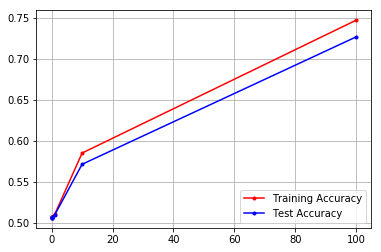

In [56]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, 'r.-') 
plt.plot(c_svm_rbf, acc_test_svm_rbf,'b.-') 
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# SVM Polynomial Kernel

In [57]:
acc_train_svm_poly = []

In [58]:
acc_test_svm_poly = []

In [59]:
c_svm_poly = []

In [60]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability=False, kernel='poly', C=c, gamma='auto')
    
#     A = X_train[0:300,:]  # First 300 rows of training set.
#     B = Y_train[0:300]  
#     C = X_test[0:100,:]   # First 100 rows of test set.
#     D = Y_test[0:100]
    
    # TODO - Fit the classifier on the training set - 5 points
    # Use A and B to train and C and D to test.
#     svc_polynomial.fit(A, B)
    svc_polynomial.fit(X_train, Y_train.ravel())
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = np.mean(Yhat_svc_poly_train == Y_train.ravel())
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = np.mean(Yhat_svc_poly_test == Y_test.ravel())
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)

In [61]:
cVals = np.geomspace(0.000001, 0.001, 5)
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.500333
Test Accuracy = 0.500000
Train Accuracy = 0.501000
Test Accuracy = 0.500000
Train Accuracy = 0.502000
Test Accuracy = 0.500000
Train Accuracy = 0.502667
Test Accuracy = 0.500333
Train Accuracy = 0.503333
Test Accuracy = 0.500667


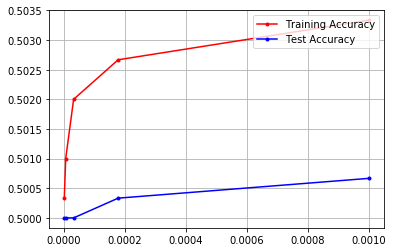

In [62]:
plt.plot(c_svm_poly, acc_train_svm_poly, 'r.-') 
plt.plot(c_svm_poly, acc_test_svm_poly,'b.-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')